In [1]:
import numpy as np
from matplotlib import pyplot as plt
import glob

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.style.use('seaborn')

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

matplotlib.rcParams.update(nice_fonts)

In [3]:
import seaborn as sns
sns.set_context(rc=nice_fonts)   

In [7]:
tau_bc = []
tau_bc_hung = []
tau_sink = []
tau_tcn_hung = []
tau_tcn = []
for seed in range(1,20):
    try:
        tau_bc.append(np.genfromtxt('tau_bc_%02d.txt'%seed))
        tau_bc_hung.append(np.genfromtxt('tau_bc_hung%02d.txt'%seed))
        tau_sink.append(np.genfromtxt('tau_sink_%02d.txt'%seed))
        tau_tcn_hung.append(np.genfromtxt('tau_tcn_hung%02d.txt'%seed))
        tau_tcn.append(np.genfromtxt('tau_tcn_%02d.txt'%seed))
    except:
        continue;

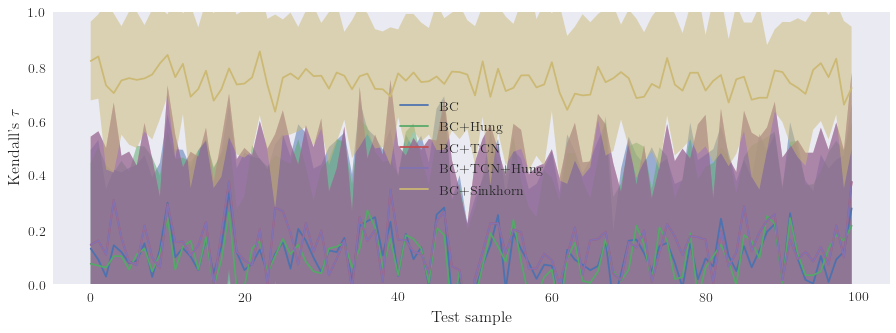

In [8]:
plt.figure(figsize=(15,5))

mu = np.mean(np.array(tau_bc),axis=0)
std = np.std(np.array(tau_bc),axis=0)

plt.plot(mu,label='BC')
plt.fill_between(np.arange(mu.shape[0]),mu-std,mu+std,alpha=0.5)

mu = np.mean(np.array(tau_bc_hung),axis=0)
std = np.std(np.array(tau_bc_hung),axis=0)

plt.plot(mu,label='BC+Hung')
plt.fill_between(np.arange(mu.shape[0]),mu-std,mu+std,alpha=0.5)

mu = np.mean(np.array(tau_tcn),axis=0)
std = np.std(np.array(tau_tcn),axis=0)

plt.plot(mu,label='BC+TCN')
plt.fill_between(np.arange(mu.shape[0]),mu-std,mu+std,alpha=0.5)

mu = np.mean(np.array(tau_tcn),axis=0)
std = np.std(np.array(tau_tcn),axis=0)

plt.plot(mu,label='BC+TCN+Hung')
plt.fill_between(np.arange(mu.shape[0]),mu-std,mu+std,alpha=0.5)

mu = np.mean(np.array(tau_sink),axis=0)
std = np.std(np.array(tau_sink),axis=0)

plt.plot(mu,label='BC+Sinkhorn')
plt.fill_between(np.arange(mu.shape[0]),mu-std,mu+std,alpha=0.5)

plt.grid()
plt.xlabel('Test sample')
plt.ylabel('Kendall\'s $\\tau$')
plt.legend()
plt.ylim(0,1)
plt.show()

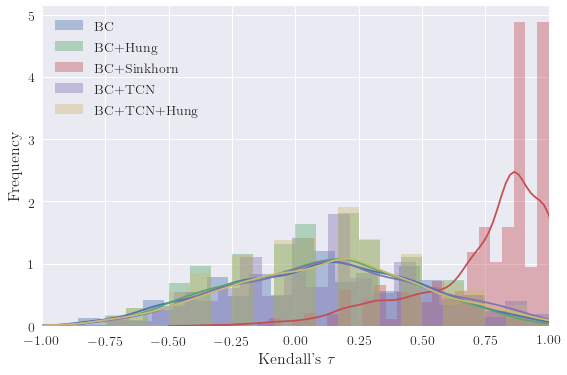

In [9]:
sns.distplot(np.concatenate(tau_bc).ravel(),label='BC')
sns.distplot(np.concatenate(tau_bc_hung).ravel(),label='BC+Hung')
sns.distplot(np.concatenate(tau_sink).ravel(),label='BC+Sinkhorn')
sns.distplot(np.concatenate(tau_tcn).ravel(),label='BC+TCN')
sns.distplot(np.concatenate(tau_tcn_hung).ravel(),label='BC+TCN+Hung')

plt.grid()
plt.xlabel('Kendall\'s $\\tau$')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.xlim(-1,1)
plt.grid()
plt.savefig('kde_bc.pdf')
plt.show()